In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/measured_rates.csv')

In [3]:
for c in df.columns:
    print c

Ci_multi
Ci_multi_err
Ci_single
Ci_single_err
Ci_tot
Ci_tot_err
Ci1_thr
Ci1_thr_err
Ci1_pnr
Ci1_pnr_err
Ci12_thr
Ci12_thr_err
Ci12_pnr
Ci12_pnr_err
Ci2_thr
Ci2_thr_err
Ci2_pnr
Ci2_pnr_err
C1_tot
C1_tot_err
C12
C12_err
C2_tot
C2_tot_err
shg_current


In [5]:
for mode in ['thr', 'pnr']:
    for ref in ['1', '2']:
        name = 'eta0_i_{}_r{}'.format(mode, ref)
        num = 'Ci{}_{}'.format(ref, mode)
        den = 'C{}_tot'.format(ref)
        df[name] = df[num]/df[den]
        df[name+'_err'] = df[name]*np.hypot(df[num+'_err']/df[num], df[den+'_err']/df[den])

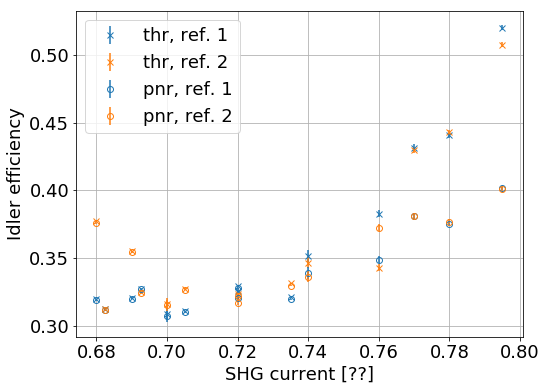

In [25]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8,6))
ms = {'thr': 'x', 'pnr': 'o'}
mc = {'1': 'C0', '2':'C1'}

auxDf = df[df['shg_current'] < 0.8]
for mode in ['thr', 'pnr']:
    for ref in ['1', '2']:
        name = 'eta0_i_{}_r{}'.format(mode, ref)
        
        plt.errorbar(auxDf['shg_current'], auxDf[name], yerr=auxDf[name+'_err'],
                     marker=ms[mode], color=mc[ref], 
                     mfc='none', ls='none',
                     label=mode+', ref. '+ref
                    )
plt.grid()
plt.xlabel('SHG current [??]')
plt.ylabel('Efficiency')
plt.legend(loc='best')